In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Path to your CSV file
csv_file_path = '/content/new_labels.csv'

# Load data into a Pandas DataFrame
df = pd.read_csv(csv_file_path)


pd.set_option('display.expand_frame_repr', False)

# Display the DataFrame
print(df)

FileNotFoundError: [Errno 2] No such file or directory: '/content/new_labels.csv'

In [ ]:
folder_to_delete = '/content/test'
shutil.rmtree(folder_to_delete)
folder_to_delete = '/content/train'
shutil.rmtree(folder_to_delete)
folder_to_delete = '/content/validation'
shutil.rmtree(folder_to_delete)

FileNotFoundError: [Errno 2] No such file or directory: '/content/test'

In [ ]:
import csv
# Define file paths (modify as needed)
input_file = "/content/new_labels.csv"
train_file = "train.txt"
val_file = "validation.txt"
test_file = "test.txt"

# Open the input file in read mode
with open(input_file, "r") as csvfile:
  reader = csv.reader(csvfile)

  # Skip header row (optional)
  next(reader, None)  # Uncomment this line if your CSV has a header row

  # Open output files in write mode
  with open(train_file, "w") as train_out, \
       open(val_file, "w") as val_out, \
       open(test_file, "w") as test_out:

    # Iterate through rows
    for row in reader:
      validation_value = row[-1]  # Access the last element (validation column)

      if validation_value == "train":
        train_out.write(",".join(row) + "\n")  # Join with comma and add newline
      elif validation_value == "validation":
        val_out.write(",".join(row) + "\n")
      elif validation_value == "test":
        test_out.write(",".join(row) + "\n")
      else:
        # Handle rows with unexpected validation values (optional)
        print(f"Warning: Unexpected validation value: {validation_value}")

# Close files (implicitly handled by `with` statement)

In [ ]:
def clean_and_modify_file(file_path):
  """
  Reads an existing TXT file, removes the validation part from each line,
  transforms "Hogweed" to "0", and directly modifies the file contents.
  """
  lines = []
  with open(file_path, "r") as f_in:
    for line in f_in:
      # Split line by comma (adjust if your delimiter is different)
      data_parts = line.strip().split(",")
      # Remove the last element (validation)
      cleaned_data = data_parts[:-1]

      # Replace "Hogweed" with "0" in class names
      for i in range(len(cleaned_data)):
        if cleaned_data[i] == "Hogweed":
          cleaned_data[i] = "0"

      # Join cleaned data back with comma and newline
      lines.append(",".join(cleaned_data) + "\n")

  # Overwrite the file with cleaned content
  with open(file_path, "w") as f_out:
    f_out.writelines(lines)

# Define file paths (modify as needed)
train_file = "train.txt"
val_file = "validation.txt"
test_file = "test.txt"

# Clean and modify each file directly
clean_and_modify_file(train_file)
clean_and_modify_file(val_file)
clean_and_modify_file(test_file)

print("Files cleaned and modified in-place!")

Files cleaned and modified in-place!


In [ ]:
def remove_prefix(file_path, prefix="images/"):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    with open(file_path, 'w') as file:
        for line in lines:
            if line.startswith(prefix):
                file.write(line[len(prefix):])
            else:
                file.write(line)

# List of files to process
file_paths = ['train.txt', 'test.txt', 'validation.txt']

for file_path in file_paths:
    remove_prefix(file_path)

In [ ]:
import os
import shutil

def process_txt_file(txt_file, images_folder):
    # Read image paths from the txt file
    with open(txt_file, 'r') as file:
        lines = file.readlines()

    # Extract unique image names from the lines
    image_paths = set(line.split(',')[0] for line in lines)

    # Create a new folder with the same name as the txt file (without .txt extension)
    dest_folder = os.path.splitext(txt_file)[0]
    os.makedirs(dest_folder, exist_ok=True)

    # Iterate through the list and copy images to the new folder
    for image_path in image_paths:
        src_path = os.path.join(images_folder, image_path)
        if os.path.exists(src_path):
            shutil.copy2(src_path, dest_folder)
        else:
            print(f"Image {src_path} not found.")

    print(f"Images copied to {dest_folder}")

# Example usage:
txt_file = 'test.txt'
images_folder = '/content/drive/MyDrive/Hogweed/images'
process_txt_file(txt_file, images_folder)

Images copied to test


In [ ]:
import os
import shutil

def process_txt_file(txt_file, images_folder):
    # Read image paths from the txt file
    with open(txt_file, 'r') as file:
        lines = file.readlines()

    # Extract unique image names from the lines
    image_paths = set(line.split(',')[0] for line in lines)

    # Create a new folder with the same name as the txt file (without .txt extension)
    dest_folder = os.path.splitext(txt_file)[0]
    os.makedirs(dest_folder, exist_ok=True)

    # Iterate through the list and copy images to the new folder
    for image_path in image_paths:
        src_path = os.path.join(images_folder, image_path)
        if os.path.exists(src_path):
            shutil.copy2(src_path, dest_folder)
        else:
            print(f"Image {src_path} not found.")

    print(f"Images copied to {dest_folder}")

# Example usage:
txt_file = 'train.txt'
images_folder = '/content/drive/MyDrive/Hogweed/images'
process_txt_file(txt_file, images_folder)

Images copied to train


In [ ]:
def process_txt_file(txt_file, images_folder):
    # Read image paths from the txt file
    with open(txt_file, 'r') as file:
        lines = file.readlines()

    # Extract unique image names from the lines
    image_paths = set(line.split(',')[0] for line in lines)

    # Create a new folder with the same name as the txt file
    dest_folder = os.path.splitext(txt_file)[0]
    os.makedirs(dest_folder, exist_ok=True)

    # Iterate through the list and copy images to the new folder
    for image_path in image_paths:
        src_path = os.path.join(images_folder, image_path)
        if os.path.exists(src_path):
            shutil.copy2(src_path, dest_folder)
        else:
            print(f"Image {src_path} not found.")

    print(f"Images copied to {dest_folder}")

# Example usage:
txt_file = 'validation.txt'
images_folder = '/content/drive/MyDrive/Hogweed/images'
process_txt_file(txt_file, images_folder)

Images copied to validation


In [ ]:
def clean_data(folder):
    txt_file = None
    for file in os.listdir(folder):
        if file.endswith('.txt'):
            txt_file = os.path.join(folder, file)
            break

    if not txt_file:
        print(f"No .txt file found in {folder}")
        return

    # Read lines from the txt file and filter out invalid lines
    with open(txt_file, 'r') as file:
        lines = file.readlines()

    valid_lines = []
    removed_images = []
    for line in lines:
        parts = line.strip().split(',')
        if '' in parts[1:]:  # Check for missing data in bounding box coordinates
            removed_images.append(parts[0])
        else:
            valid_lines.append(line)

    # Write back the valid lines to the txt file
    with open(txt_file, 'w') as file:
        file.writelines(valid_lines)

    # Remove the corresponding images
    for image in removed_images:
        image_path = os.path.join(folder, image)
        if os.path.exists(image_path):
            os.remove(image_path)

    print(f"Removed {len(removed_images)} invalid entries from {txt_file}")


base_folders = ['train', 'test', 'validation']

# Process each folder
for base_folder in base_folders:
    clean_data(base_folder)

Removed 84 invalid entries from train/train.txt
Removed 12 invalid entries from test/test.txt
Removed 6 invalid entries from validation/validation.txt


In [ ]:
def convert_coordinates_in_folder(folder):
    # Iterate through files in the folder
    for file_name in os.listdir(folder):
        if file_name.endswith('.txt'):
            txt_file_path = os.path.join(folder, file_name)
            new_lines = []
            with open(txt_file_path, 'r') as txt_file:
                lines = txt_file.readlines()

                # Process each line in the text file
                for line in lines:
                    parts = line.strip().split(',')
                    try:
                        image_filename = parts[0]
                        # Convert coordinates to floats
                        x1, y1, x2, y2 = map(float, parts[1:5])
                        class_id = int(parts[5])  # Convert class ID to integer

                        # Get image size
                        image_path = os.path.join(folder, image_filename)
                        image_width, image_height = get_image_size(image_path)

                        # Convert bounding box coordinates to normalized format
                        center_x = (x1 + x2) / 2 / image_width
                        center_y = (y1 + y2) / 2 / image_height
                        width = (x2 - x1) / image_width
                        height = (y2 - y1) / image_height

                        # Construct the new line with converted coordinates
                        new_line = f"{image_filename},{class_id},{center_x},{center_y},{width},{height}\n"
                        new_lines.append(new_line)

                    except Exception as e:
                        print(f"Error processing line: {line}")
                        print(f"Exception: {e}")
                        print(f"Parts: {parts}")

            # Write the updated lines back to the original text file
            with open(txt_file_path, 'w') as txt_file:
                txt_file.writelines(new_lines)

def get_image_size(image_path):
    from PIL import Image
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height

# Define the folders
base_folders = ['train', 'test', 'validation']

# Process each folder
for base_folder in base_folders:
    folder_path = os.path.join('/content/', base_folder)
    convert_coordinates_in_folder(folder_path)

In [ ]:
import json
import os

# Function to parse annotations from .txt files
def parse_annotations(txt_file):
    annotations = []
    with open(txt_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            parts = line.split()
            # Extract information
            image_id = parts[0]
            x, y, width, height = map(float, parts[2:])
            annotations.append({
                'image_id': image_id,
                'bbox': [x, y, width, height],
                'category_id': 0  # Assuming all annotations belong to the same category
            })
    return annotations

# Function to convert annotations to COCO JSON format
def annotations_to_coco_format(annotations):
    coco_data = {
        'images': [],
        'annotations': [],
        'categories': [{'id': 0, 'name': 'hogweed'}]
    }
    image_ids = {}
    for annotation in annotations:
        image_id = annotation['image_id']
        if image_id not in image_ids:
            image_ids[image_id] = len(image_ids) + 1
            # Add image info
            coco_data['images'].append({
                'id': image_ids[image_id],
                'file_name': image_id
            })
        # Add annotation info
        coco_data['annotations'].append({
            'id': len(coco_data['annotations']) + 1,
            'image_id': image_ids[image_id],
            'category_id': annotation['category_id'],
            'bbox': annotation['bbox'],
            'area': annotation['bbox'][2] * annotation['bbox'][3],
            'iscrowd': 0
        })
    return coco_data

# Main function to process the dataset
def convert_to_coco_format(input_dir, output_dir):
    annotations = []
    print("Parsing annotations...")
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.txt'):
                annotations.extend(parse_annotations(os.path.join(root, file)))
    print("Converting annotations to COCO format...")
    coco_data = annotations_to_coco_format(annotations)
    output_file = os.path.join(output_dir, 'coco_annotations.json')
    print("Writing COCO JSON data to file...")
    with open(output_file, 'w') as f:
        json.dump(coco_data, f)
    print("Conversion complete!")

# Example usage
input_dir = '/content/drive/MyDrive/Hogweed/yolo/dataset'
output_dir = '/content/drive/MyDrive/Hogweed/Coco_dataset'
convert_to_coco_format(input_dir, output_dir)

In [ ]:
import pandas as pd
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Path to your text file
txt_file_path = '/content/test/test.txt'

# Path to your images folder
images_folder_path = '/content/test'

# Load data into a Pandas DataFrame
df = pd.read_csv(txt_file_path, header=None, names=['image', 'class_id', 'center_x', 'center_y', 'width', 'height'])

# Function to plot image with bounding boxes
def plot_image_with_boxes(image_path, boxes):
    # Load the image
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)
    image_width, image_height = img.size

    # Draw each bounding box
    for box in boxes:
        class_id, center_x, center_y, width, height = box
        # Convert normalized coordinates to absolute pixel values
        abs_center_x = center_x * image_width
        abs_center_y = center_y * image_height
        abs_width = width * image_width
        abs_height = height * image_height
        # Calculate the coordinates of the bounding box
        left = abs_center_x - abs_width / 2
        top = abs_center_y - abs_height / 2
        right = abs_center_x + abs_width / 2
        bottom = abs_center_y + abs_height / 2
        # Draw the bounding box
        draw.rectangle([left, top, right, bottom], outline='red', width=2)

    # Display the image with bounding boxes
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Group the DataFrame by image to process each image individually
grouped = df.groupby('image')

# Iterate over each group (i.e., each image and its annotations)
for image_name, group in grouped:
    image_path = os.path.join(images_folder_path, image_name)
    if os.path.exists(image_path):  # Check if the image file exists
        boxes = group[['class_id', 'center_x', 'center_y', 'width', 'height']].values
        plot_image_with_boxes(image_path, boxes)
    else:
        print(f"Image {image_name} not found.")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Path to your text file
txt_file_path = '/content/test/test.txt'

# Path to your images folder
images_folder_path = '/content/test/'

# Load data into a Pandas DataFrame
df = pd.read_csv(txt_file_path, header=None, names=['image', 'class_id', 'center_x', 'center_y', 'width', 'height'])

# Function to plot image with bounding boxes
def plot_image_with_boxes(image_path, boxes):
    # Load the image
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)
    image_width, image_height = img.size

    # Draw each bounding box
    for box in boxes:
        class_id, center_x, center_y, width, height = box
        # Convert normalized coordinates to absolute pixel values
        abs_center_x = center_x * image_width
        abs_center_y = center_y * image_height
        abs_width = width * image_width
        abs_height = height * image_height
        # Calculate the coordinates of the bounding box
        left = abs_center_x - abs_width / 2
        top = abs_center_y - abs_height / 2
        right = abs_center_x + abs_width / 2
        bottom = abs_center_y + abs_height / 2
        # Draw the bounding box with a prominent color
        draw.rectangle([left, top, right, bottom], outline='white', width=7)

    # Display the image with bounding boxes
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Group the DataFrame by image to process each image individually
grouped = df.groupby('image')

# Iterate over each group (i.e., each image and its annotations)
for image_name, group in grouped:
    image_path = os.path.join(images_folder_path, image_name)
    if os.path.exists(image_path):  # Check if the image file exists
        boxes = group[['class_id', 'center_x', 'center_y', 'width', 'height']].values
        plot_image_with_boxes(image_path, boxes)
    else:
        print(f"Image {image_name} not found.")


Output hidden; open in https://colab.research.google.com to view.

# Covert to YOLO


In [ ]:
import pandas as pd
import os
import shutil
from PIL import Image

# Paths for input and output
annotations_file_path = 'test/test.txt'
images_folder_path = 'test/'
output_folder_path = 'yolo_test'
output_images_folder = os.path.join(output_folder_path, 'images')
output_labels_folder = os.path.join(output_folder_path, 'labels')

# Create output folders if they don't exist
os.makedirs(output_images_folder, exist_ok=True)
os.makedirs(output_labels_folder, exist_ok=True)

# Load data into a Pandas DataFrame
df = pd.read_csv(annotations_file_path, sep=',', header=None, names=['image', 'class_id', 'center_x', 'center_y', 'width', 'height'])

# Strip any leading or trailing whitespace from image filenames
df['image'] = df['image'].str.strip()

# Function to save YOLO format annotations
def save_yolo_format(image_name, annotations):
    # Create a YOLO annotation file for each image
    yolo_file_path = os.path.join(output_labels_folder, os.path.splitext(image_name)[0] + '.txt')
    with open(yolo_file_path, 'w') as yolo_file:
        for annotation in annotations:
            class_id, center_x, center_y, width, height = annotation
            yolo_file.write(f"{class_id} {center_x} {center_y} {width} {height}\n")

# Iterate over each image in the images folder
for image_name in os.listdir(images_folder_path):
    image_path = os.path.join(images_folder_path, image_name)

    # Check if the path is a file and it has an image extension
    if os.path.isfile(image_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        # Copy the image to the output folder
        shutil.copy(image_path, output_images_folder)

        # Find the corresponding annotations in the DataFrame
        annotations = df[df['image'] == image_name][['class_id', 'center_x', 'center_y', 'width', 'height']].values

        # Debugging: Print the annotations found
        if len(annotations) > 0:
            print(f"Annotations found for image: {image_name}")
            save_yolo_format(image_name, annotations)
        else:
            print(f"No annotations found for image: {image_name}")
    else:
        print(f"File not an image: {image_path}")

print("Conversion and copying completed successfully.")


Annotations found for image: 2017-05-09_DJI_0399.JPG
Annotations found for image: egedal_DJI_0004.JPG
Annotations found for image: 2017-05-09_DJI_0636.JPG
Annotations found for image: 2017-05-09_DJI_0637.JPG
Annotations found for image: 2018-05-30_DJI_0908.JPG
Annotations found for image: 2018-05-30_DJI_0907.JPG
Annotations found for image: 2017-05-09_DJI_0650.JPG
File not an image: test/test.txt
Annotations found for image: 2018-05-30_DJI_0631.JPG
Conversion and copying completed successfully.


In [ ]:
# Paths for input and output
annotations_file_path = 'train/train.txt'
images_folder_path = 'train/'
output_folder_path = 'yolo_train'
output_images_folder = os.path.join(output_folder_path, 'images')
output_labels_folder = os.path.join(output_folder_path, 'labels')

# Create output folders if they don't exist
os.makedirs(output_images_folder, exist_ok=True)
os.makedirs(output_labels_folder, exist_ok=True)

# Load data into a Pandas DataFrame
df = pd.read_csv(annotations_file_path, sep=',', header=None, names=['image', 'class_id', 'center_x', 'center_y', 'width', 'height'])

# Strip any leading or trailing whitespace from image filenames
df['image'] = df['image'].str.strip()

# Function to save YOLO format annotations
def save_yolo_format(image_name, annotations):
    # Create a YOLO annotation file for each image
    yolo_file_path = os.path.join(output_labels_folder, os.path.splitext(image_name)[0] + '.txt')
    with open(yolo_file_path, 'w') as yolo_file:
        for annotation in annotations:
            class_id, center_x, center_y, width, height = annotation
            yolo_file.write(f"{class_id} {center_x} {center_y} {width} {height}\n")

# Iterate over each image in the images folder
for image_name in os.listdir(images_folder_path):
    image_path = os.path.join(images_folder_path, image_name)

    # Check if the path is a file and it has an image extension
    if os.path.isfile(image_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        # Copy the image to the output folder
        shutil.copy(image_path, output_images_folder)

        # Find the corresponding annotations in the DataFrame
        annotations = df[df['image'] == image_name][['class_id', 'center_x', 'center_y', 'width', 'height']].values

        # Debugging: Print the annotations found
        if len(annotations) > 0:
            print(f"Annotations found for image: {image_name}")
            save_yolo_format(image_name, annotations)
        else:
            print(f"No annotations found for image: {image_name}")
    else:
        print(f"File not an image: {image_path}")

print("Conversion and copying completed successfully.")

Annotations found for image: 2017-05-09_DJI_0506.JPG
Annotations found for image: 2018-05-30_DJI_0914.JPG
Annotations found for image: 2017-05-09_DJI_0693.JPG
Annotations found for image: 2018-05-30_DJI_0990.JPG
Annotations found for image: 2017-04-05_DJI_0180.JPG
Annotations found for image: 2017-04-05_DJI_0182.JPG
Annotations found for image: 2017-04-05_DJI_0165.JPG
Annotations found for image: 2017-05-09_DJI_0562.JPG
Annotations found for image: 2017-05-09_DJI_0361.JPG
Annotations found for image: 2017-05-31_DJI_0037.JPG
Annotations found for image: 2017-05-09_DJI_0374.JPG
Annotations found for image: 2018-05-30_DJI_0501.JPG
Annotations found for image: 2018-05-30_DJI_0913.JPG
Annotations found for image: 2017-04-05_DJI_0084.JPG
Annotations found for image: 2017-04-05_DJI_0174.JPG
Annotations found for image: egedal_DJI_0018.JPG
Annotations found for image: 2017-04-05_DJI_0179.JPG
Annotations found for image: 2017-04-05_DJI_0151.JPG
Annotations found for image: 2018-05-30_DJI_0015.J

In [ ]:
# Paths for input and output
annotations_file_path = 'validation/validation.txt'
images_folder_path = 'validation/'
output_folder_path = 'yolo_validation'
output_images_folder = os.path.join(output_folder_path, 'images')
output_labels_folder = os.path.join(output_folder_path, 'labels')

# Create output folders if they don't exist
os.makedirs(output_images_folder, exist_ok=True)
os.makedirs(output_labels_folder, exist_ok=True)

# Load data into a Pandas DataFrame
df = pd.read_csv(annotations_file_path, sep=',', header=None, names=['image', 'class_id', 'center_x', 'center_y', 'width', 'height'])

# Strip any leading or trailing whitespace from image filenames
df['image'] = df['image'].str.strip()

# Function to save YOLO format annotations
def save_yolo_format(image_name, annotations):
    # Create a YOLO annotation file for each image
    yolo_file_path = os.path.join(output_labels_folder, os.path.splitext(image_name)[0] + '.txt')
    with open(yolo_file_path, 'w') as yolo_file:
        for annotation in annotations:
            class_id, center_x, center_y, width, height = annotation
            yolo_file.write(f"{class_id} {center_x} {center_y} {width} {height}\n")

# Iterate over each image in the images folder
for image_name in os.listdir(images_folder_path):
    image_path = os.path.join(images_folder_path, image_name)

    # Check if the path is a file and it has an image extension
    if os.path.isfile(image_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        # Copy the image to the output folder
        shutil.copy(image_path, output_images_folder)

        # Find the corresponding annotations in the DataFrame
        annotations = df[df['image'] == image_name][['class_id', 'center_x', 'center_y', 'width', 'height']].values

        # Debugging: Print the annotations found
        if len(annotations) > 0:
            print(f"Annotations found for image: {image_name}")
            save_yolo_format(image_name, annotations)
        else:
            print(f"No annotations found for image: {image_name}")
    else:
        print(f"File not an image: {image_path}")

print("Conversion and copying completed successfully.")

Annotations found for image: 2017-05-09_DJI_0585.JPG
Annotations found for image: 2017-05-09_DJI_0539.JPG
Annotations found for image: 2017-04-05_DJI_0109.JPG
Annotations found for image: 2018-05-30_DJI_0511.JPG
Annotations found for image: 2017-04-05_DJI_0076.JPG
Annotations found for image: 2017-04-05_DJI_0097.JPG
Annotations found for image: 2017-04-05_DJI_0192.JPG
Annotations found for image: 2018-05-30_DJI_0499.JPG
Annotations found for image: 2018-05-30_DJI_0017.JPG
Annotations found for image: 2017-04-05_DJI_0085.JPG
Annotations found for image: 2017-05-09_DJI_0540.JPG
Annotations found for image: 2017-05-31_DJI_0113.JPG
File not an image: validation/validation.txt
Annotations found for image: egedal_DJI_0007.JPG
Annotations found for image: 2017-05-09_DJI_0360.JPG
Conversion and copying completed successfully.


In [ ]:
folder_to_delete = '/content/coco_test'
shutil.rmtree(folder_to_delete)

In [ ]:
import json
import os
import shutil
from PIL import Image

# Paths for input and output
yolo_labels_folder = '/content/yolo_datast/yolo_test/labels'
output_coco_folder = 'coco_test'
output_images_folder = os.path.join(output_coco_folder, 'images')
output_coco_file = os.path.join(output_coco_folder, 'annotations.json')

# Create output folder structure
os.makedirs(output_images_folder, exist_ok=True)

# Initialize COCO dataset dictionary
coco_dataset = {
    "info": {},
    "licenses": [],
    "categories": [],  # You may need to define categories based on your dataset
    "images": [],
    "annotations": []
}

# Function to convert YOLO annotations to COCO format
def yolo_to_coco(yolo_annotation, image_id, image_width, image_height):
    class_id, center_x, center_y, width, height = yolo_annotation
    x = (center_x - width / 2) * image_width
    y = (center_y - height / 2) * image_height
    w = width * image_width
    h = height * image_height
    coco_annotation = {
        "id": len(coco_dataset["annotations"]) + 1,
        "image_id": image_id,
        "category_id": class_id,
        "bbox": [x, y, w, h],
        "area": w * h,
        "iscrowd": 0
    }
    return coco_annotation

# Initialize image_id counter
image_id = 1

# Iterate over each image in the images folder
for image_name in os.listdir('yolo_datast/yolo_test/images'):
    image_path = os.path.join('yolo_datast/yolo_test/images', image_name)
    image = Image.open(image_path)
    image_width, image_height = image.size

    # Add image metadata to the COCO dataset
    image_dict = {
        "id": image_id,
        "width": image_width,
        "height": image_height,
        "file_name": image_name
    }
    coco_dataset["images"].append(image_dict)

    # Read YOLO annotations from the corresponding labels file
    labels_file_path = os.path.join(yolo_labels_folder, os.path.splitext(image_name)[0] + '.txt')
    if not os.path.exists(labels_file_path):
        print(f"No annotations found for image: {image_name}")
        image_id += 1
        continue

    with open(labels_file_path, 'r') as f:
        yolo_annotations = [list(map(float, line.strip().split())) for line in f.readlines()]

    # Convert YOLO annotations to COCO format and add them to the COCO dataset
    for yolo_annotation in yolo_annotations:
        coco_annotation = yolo_to_coco(yolo_annotation, image_id, image_width, image_height)
        coco_dataset["annotations"].append(coco_annotation)

    # Copy the image to the output images folder
    shutil.copy(image_path, output_images_folder)

    # Increment image_id counter for the next image
    image_id += 1

# Save the COCO dataset to a JSON file
with open(output_coco_file, 'w') as f:
    json.dump(coco_dataset, f)

print("Conversion to COCO format completed successfully.")



Conversion to COCO format completed successfully.


In [ ]:
import json
import os
import shutil
from PIL import Image

# Paths for input and output
yolo_labels_folder = '/content/yolo_datast/yolo_train/labels'
output_coco_folder = 'coco_train'
output_images_folder = os.path.join(output_coco_folder, 'images')
output_coco_file = os.path.join(output_coco_folder, 'annotations.json')

# Create output folder structure
os.makedirs(output_images_folder, exist_ok=True)

# Initialize COCO dataset dictionary
coco_dataset = {
    "info": {},
    "licenses": [],
    "categories": [],  # You may need to define categories based on your dataset
    "images": [],
    "annotations": []
}

# Function to convert YOLO annotations to COCO format
def yolo_to_coco(yolo_annotation, image_id, image_width, image_height):
    class_id, center_x, center_y, width, height = yolo_annotation
    x = (center_x - width / 2) * image_width
    y = (center_y - height / 2) * image_height
    w = width * image_width
    h = height * image_height
    coco_annotation = {
        "id": len(coco_dataset["annotations"]) + 1,
        "image_id": image_id,
        "category_id": class_id,
        "bbox": [x, y, w, h],
        "area": w * h,
        "iscrowd": 0
    }
    return coco_annotation

# Initialize image_id counter
image_id = 1

# Iterate over each image in the images folder
for image_name in os.listdir('yolo_datast/yolo_train/images'):
    image_path = os.path.join('yolo_datast/yolo_train/images', image_name)
    image = Image.open(image_path)
    image_width, image_height = image.size

    # Add image metadata to the COCO dataset
    image_dict = {
        "id": image_id,
        "width": image_width,
        "height": image_height,
        "file_name": image_name
    }
    coco_dataset["images"].append(image_dict)

    # Read YOLO annotations from the corresponding labels file
    labels_file_path = os.path.join(yolo_labels_folder, os.path.splitext(image_name)[0] + '.txt')
    if not os.path.exists(labels_file_path):
        print(f"No annotations found for image: {image_name}")
        image_id += 1
        continue

    with open(labels_file_path, 'r') as f:
        yolo_annotations = [list(map(float, line.strip().split())) for line in f.readlines()]

    # Convert YOLO annotations to COCO format and add them to the COCO dataset
    for yolo_annotation in yolo_annotations:
        coco_annotation = yolo_to_coco(yolo_annotation, image_id, image_width, image_height)
        coco_dataset["annotations"].append(coco_annotation)

    # Copy the image to the output images folder
    shutil.copy(image_path, output_images_folder)

    # Increment image_id counter for the next image
    image_id += 1

# Save the COCO dataset to a JSON file
with open(output_coco_file, 'w') as f:
    json.dump(coco_dataset, f)

print("Conversion to COCO format completed successfully.")

Conversion to COCO format completed successfully.


In [ ]:
import json
import os
import shutil
from PIL import Image

# Paths for input and output
yolo_labels_folder = '/content/yolo_datast/yolo_validation/labels'
output_coco_folder = 'coco_validation'
output_images_folder = os.path.join(output_coco_folder, 'images')
output_coco_file = os.path.join(output_coco_folder, 'annotations.json')

# Create output folder structure
os.makedirs(output_images_folder, exist_ok=True)

# Initialize COCO dataset dictionary
coco_dataset = {
    "info": {},
    "licenses": [],
    "categories": [],  # You may need to define categories based on your dataset
    "images": [],
    "annotations": []
}

# Function to convert YOLO annotations to COCO format
def yolo_to_coco(yolo_annotation, image_id, image_width, image_height):
    class_id, center_x, center_y, width, height = yolo_annotation
    x = (center_x - width / 2) * image_width
    y = (center_y - height / 2) * image_height
    w = width * image_width
    h = height * image_height
    coco_annotation = {
        "id": len(coco_dataset["annotations"]) + 1,
        "image_id": image_id,
        "category_id": class_id,
        "bbox": [x, y, w, h],
        "area": w * h,
        "iscrowd": 0
    }
    return coco_annotation

# Initialize image_id counter
image_id = 1

# Iterate over each image in the images folder
for image_name in os.listdir('yolo_datast/yolo_validation/images'):
    image_path = os.path.join('yolo_datast/yolo_validation/images', image_name)
    image = Image.open(image_path)
    image_width, image_height = image.size

    # Add image metadata to the COCO dataset
    image_dict = {
        "id": image_id,
        "width": image_width,
        "height": image_height,
        "file_name": image_name
    }
    coco_dataset["images"].append(image_dict)

    # Read YOLO annotations from the corresponding labels file
    labels_file_path = os.path.join(yolo_labels_folder, os.path.splitext(image_name)[0] + '.txt')
    if not os.path.exists(labels_file_path):
        print(f"No annotations found for image: {image_name}")
        image_id += 1
        continue

    with open(labels_file_path, 'r') as f:
        yolo_annotations = [list(map(float, line.strip().split())) for line in f.readlines()]

    # Convert YOLO annotations to COCO format and add them to the COCO dataset
    for yolo_annotation in yolo_annotations:
        coco_annotation = yolo_to_coco(yolo_annotation, image_id, image_width, image_height)
        coco_dataset["annotations"].append(coco_annotation)

    # Copy the image to the output images folder
    shutil.copy(image_path, output_images_folder)

    # Increment image_id counter for the next image
    image_id += 1

# Save the COCO dataset to a JSON file
with open(output_coco_file, 'w') as f:
    json.dump(coco_dataset, f)

print("Conversion to COCO format completed successfully.")

Conversion to COCO format completed successfully.


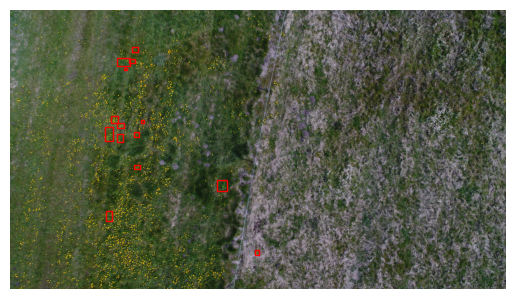

In [ ]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Path to the COCO annotation file
coco_annotation_file = 'coco_validation/annotations.json'
images_folder = 'coco_validation/images'

# Load COCO annotations
with open(coco_annotation_file, 'r') as f:
    coco_data = json.load(f)

# Helper function to plot images with bounding boxes
def plot_image_with_boxes(image_id):
    image_info = next(image for image in coco_data['images'] if image['id'] == image_id)
    image_name = image_info['file_name']
    image_path = os.path.join(images_folder, image_name)
    image = Image.open(image_path)

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Get annotations for this image
    annotations = [anno for anno in coco_data['annotations'] if anno['image_id'] == image_id]

    # Plot bounding boxes
    for annotation in annotations:
        bbox = annotation['bbox']
        x, y, w, h = bbox
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')
    plt.show()

# Example usage: Plot the first image with its annotations
plot_image_with_boxes(coco_data['images'][0]['id'])


In [ ]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Path to the COCO annotation file
coco_annotation_file = 'coco_validation/annotations.json'
images_folder = 'coco_validation/images'

# Load COCO annotations
with open(coco_annotation_file, 'r') as f:
    coco_data = json.load(f)

# Helper function to plot images with bounding boxes
def plot_images_with_boxes():
    # Get unique image IDs
    image_ids = set([anno['image_id'] for anno in coco_data['annotations']])

    # Plot each image with its annotations
    for image_id in image_ids:
        image_info = next(image for image in coco_data['images'] if image['id'] == image_id)
        image_name = image_info['file_name']
        image_path = os.path.join(images_folder, image_name)
        image = Image.open(image_path)

        # Create figure and axes
        fig, ax = plt.subplots(1)

        # Display the image
        ax.imshow(image)

        # Get annotations for this image
        annotations = [anno for anno in coco_data['annotations'] if anno['image_id'] == image_id]

        # Plot bounding boxes
        for annotation in annotations:
            bbox = annotation['bbox']
            x, y, w, h = bbox
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

        plt.title(f"Image: {image_name}")
        plt.axis('off')
        plt.show()

# Plot all images with their annotations
plot_images_with_boxes()

Output hidden; open in https://colab.research.google.com to view.